In [48]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2023-11-08
# @Filename: work.ipynb
# work for hw6 

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import math

import pandas as pd

In [49]:
class Cal_sample_statistic:
    """calculate sample statistic 
    
    1. Mean
    2. Geometric mean (can you?!)
    3. Median
    4. Mode
    5. Variance
    6. Standard deviation
    7. Skewness
    8. Kurtosis
    
    """

    def __init__(self, data: list):
        self.data = data
        self.num = len(data)

    def mean(self):
        # mean = sum / num
        sum = 0
        for i in self.data:
            sum = sum + i
        self.num = len(self.data)

        self.mean_val = sum / self.num
        
        return self.mean_val
    
    def geo_mean(self):
        # geo_mean = multip**(1/num)
        multip = 1
        for i in self.data:
            multip = multip*i

        self.geo_mean = multip**(1/self.num)

        return self.geo_mean
    
    def median(self):
        sortlist = sorted(self.data)
        flag = self.num%2
        half = int(self.num/2)
        print(flag)
        if flag == 0:
            fir_term = half - 1
            sec_term = half
            self.median = (sortlist[fir_term] + sortlist[sec_term]) / 2
        else:
            fir_term = (self.num - 1)/2
            print(fir_term)
            self.median = sortlist[fir_term]

        return self.median
    
    def mode(self):
        # mode
        count_dic = {}
        for i in self.data:
            index = 0
            for j in self.data:
                if i==j:
                    index += 1
                else:
                    pass
            
            count_dic[i] = index
        sort_dic = sorted(count_dic.items(), key=lambda x:(-x[1], x[0]))
        mode_tup = sort_dic[0]

        frequency = mode_tup[1]

        if frequency==1:
            self.mode="Not exist"
        else:
            self.mode = mode_tup[0]

        return self.mode


    def variance(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**2
            sum = sum + comp
        
        self.varianceval = sum / self.num
        return self.varianceval

    def StandardDeviation(self):
        # variance**(1/2)
        val=self.variance()
        self.StandardDeviation_val = val**(1/2)
        return self.StandardDeviation_val

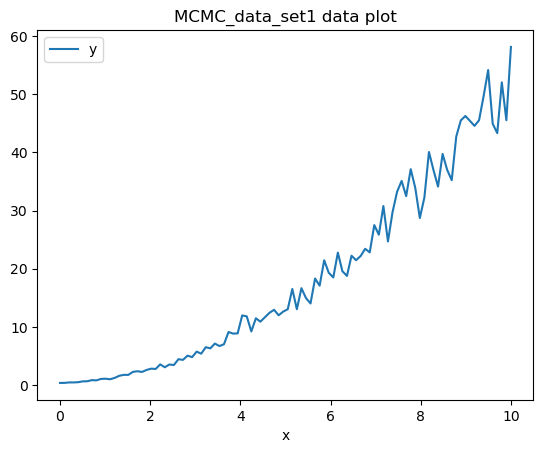

In [50]:
# Data Preparation

MCMC_data_set1 = "./MCMC_data_set1.txt"

open_MCMC_data_set1 = open(MCMC_data_set1, "r")

df_MCMC_data_set1 = pd.read_csv(MCMC_data_set1, sep = ' ', names=["x", "y"], header=None)
#df_MCMC_data_set1 = pd.DataFrame(open_MCMC_data_set1)

df_MCMC_data_set1.plot(kind='line', x="x", y="y", title="MCMC_data_set1 data plot")
plt.show()

x = df_MCMC_data_set1["x"]
y = df_MCMC_data_set1["y"]

data_x = Cal_sample_statistic(x)
x_sigma = data_x.StandardDeviation()
data_y = Cal_sample_statistic(y)
y_sigma = data_y.StandardDeviation()

Best-fit parameters:
a: 0.5102040816326531, b: 0.10204081632653061, c: 0.6122448979591837


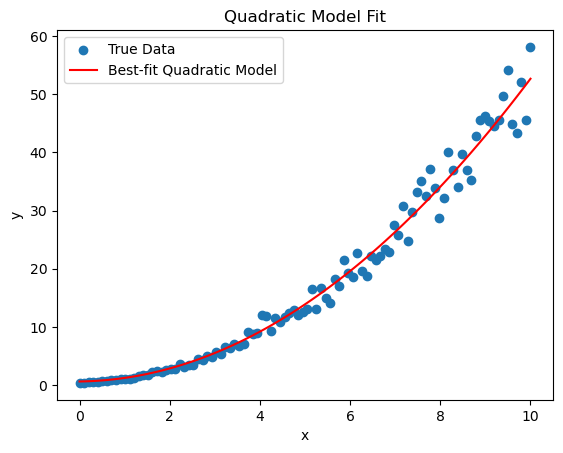

In [51]:

# Define the quadratic model
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Define parameter ranges for the grid search
a_range = np.linspace(0, 5, 50)
b_range = np.linspace(0, 5, 50)
c_range = np.linspace(0, 5, 50)

# Initialize variables to store the best-fit parameters and MSE
best_a, best_b, best_c = 0, 0, 0
best_mse = float('inf')

# Perform the grid search
for a in a_range:
    for b in b_range:
        for c in c_range:
            y_pred = quadratic_model(x, a, b, c)
            mse = np.mean((y - y_pred)**2)
            if mse < best_mse:
                best_a, best_b, best_c = a, b, c
                best_mse = mse


# Print the best-fit parameters
print("Best-fit parameters:")
print(f"a: {best_a}, b: {best_b}, c: {best_c}")

# Plot the true data and the best-fit quadratic model
plt.scatter(x, y, label="True Data")
plt.plot(x, quadratic_model(x, best_a, best_b, best_c), color='red', label="Best-fit Quadratic Model")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Model Fit')
plt.show()

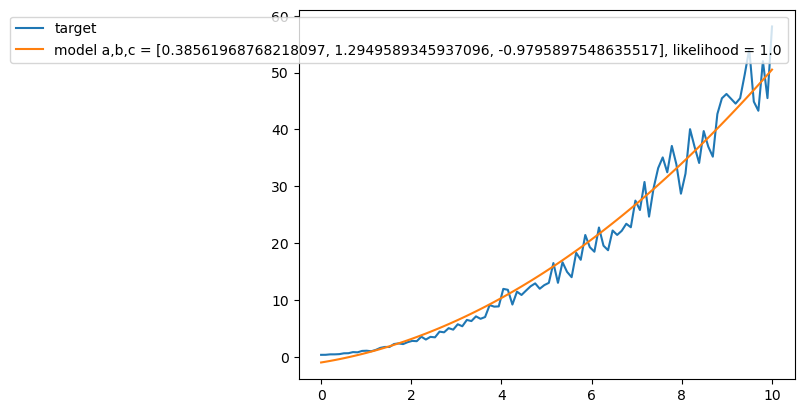

In [77]:
import numpy as np
from scipy.stats import norm
import random

# Define the quadratic model
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

chain = []
a_old, b_old, c_old = 0, 0, 0
old_pos = [a_old, b_old, c_old]
chain.append(old_pos)

def chi_squared(y, model, sigma):
    sum = 0
    for i in range(len(y)):
        Chi_squared = (y[i]-model[i])**2/sigma**2
        sum = sum + Chi_squared

    return sum

# Calculate the likelihood
old_likelihood = np.exp(-chi_squared(y, quadratic_model(x, *old_pos), x_sigma)**2)

# make new positions
record = []
new_position_list = []
new_pos = []
new_likelihood_list = []
for i in range(1000):
    a_new, b_new, c_new = a_old + np.random.normal(0,1), b_old+ np.random.normal(0,1), c_old + np.random.normal(0,1)
    new_pos = [a_new, b_new, c_new]
    #new_position_list.append(new_pos)
    
    # Calculate the likelihood
    new_likelihood = np.exp(-chi_squared(y, quadratic_model(x, *new_pos), y_sigma)**2)
    new_likelihood_list.append(new_likelihood)
    
    # likelihood = exp(-chi-squared**2)
    # likelihood_ratio = new/old
    
    if new_likelihood > old_likelihood:
        new_position_list.append(new_pos)
        old_pos = new_pos
    elif new_likelihood < old_likelihood:
        rd = random.random()
        if rd < new_likelihood/old_likelihood:
            record.append(new_pos)
            old_pos = new_pos
        else:
            record.append(old_pos)
            old_pos = old_pos

plt.figure()
plt.plot(x, y, label="target")
plt.plot(x, quadratic_model(x, *new_pos), label=f"model a,b,c = {new_pos}, likelihood = {new_likelihood}")
plt.legend()
plt.show()

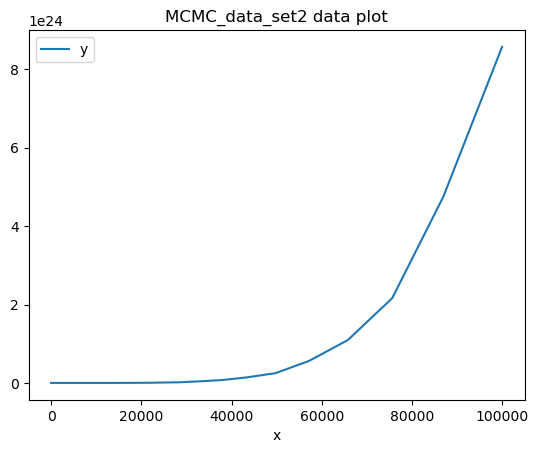

In [58]:
MCMC_data_set2 = "./MCMC_data_set2.txt"

open_MCMC_data_set2 = open(MCMC_data_set2, "r")

df_MCMC_data_set2 = pd.read_csv(MCMC_data_set2, sep = ' ', names=["x", "y"], header=None)
#df_MCMC_data_set1 = pd.DataFrame(open_MCMC_data_set1)

df_MCMC_data_set2.plot(kind='line', x="x", y="y", title="MCMC_data_set2 data plot")
plt.show()

x2 = df_MCMC_data_set2["x"]
y2 = df_MCMC_data_set2["y"]

data_x = Cal_sample_statistic(x2)
x_sigma = data_x.StandardDeviation()
data_y = Cal_sample_statistic(y2)
y_sigma = data_y.StandardDeviation()

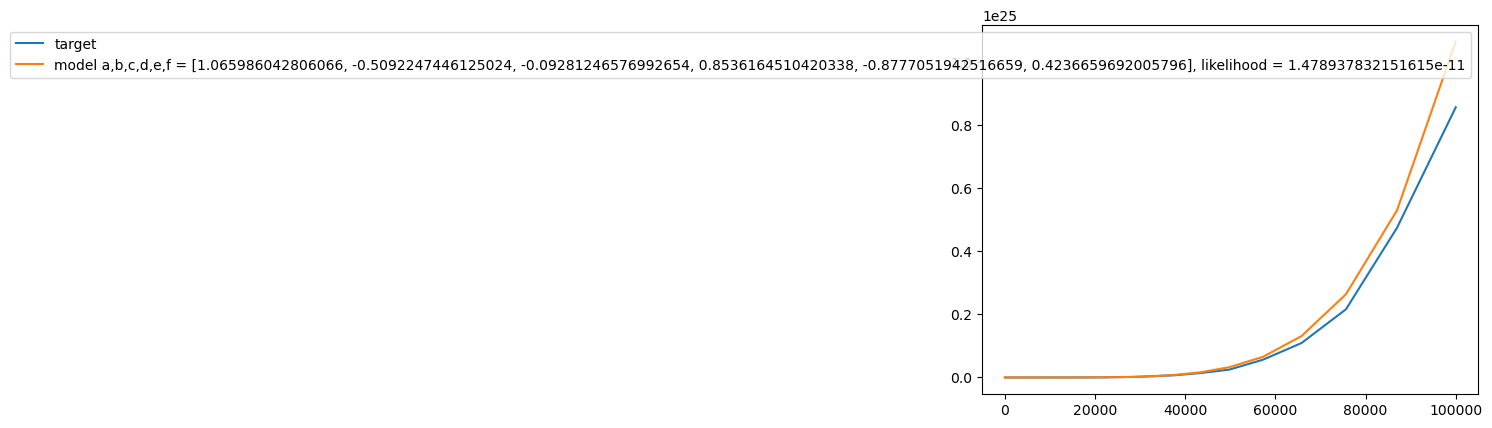

In [62]:
import numpy as np
from scipy.stats import norm
import random

# Define the quadratic model
def quadratic_model(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

chain = []
a_old, b_old, c_old, d_old, e_old, f_old = 0, 0, 0, 0, 0, 0
old_pos = [a_old, b_old, c_old, d_old, e_old, f_old]
chain.append(old_pos)

def chi_squared(y, model, sigma):
    sum = 0
    for i in range(len(y)):
        Chi_squared = (y[i]-model[i])**2/sigma**2
        sum = sum + Chi_squared

    return sum

# Calculate the likelihood
old_likelihood = np.exp(-chi_squared(y2, quadratic_model(x2, *old_pos), x_sigma)**2)

# make new positions
record = []
new_position_list = []
new_pos = []
new_likelihood_list = []
for i in range(1000):
    a_new, b_new, c_new = a_old + np.random.normal(0,1), b_old+ np.random.normal(0,1), c_old + np.random.normal(0,1)
    d_new, e_new, f_new = d_old + np.random.normal(0,1), e_old+ np.random.normal(0,1), f_old + np.random.normal(0,1)
    new_pos = [a_new, b_new, c_new, d_new, e_new, f_new]
    #new_position_list.append(new_pos)
    
    # Calculate the likelihood
    new_likelihood = np.exp(-chi_squared(y2, quadratic_model(x2, *new_pos), y_sigma)**2)
    new_likelihood_list.append(new_likelihood)
    
    # likelihood = exp(-chi-squared**2)
    # likelihood_ratio = new/old
    
    if new_likelihood > old_likelihood:
        new_position_list.append(new_pos)
        old_pos = new_pos
    elif new_likelihood < old_likelihood:
        rd = random.random()
        if rd < new_likelihood/old_likelihood:
            record.append(new_pos)
            old_pos = new_pos
        else:
            record.append(old_pos)
            old_pos = old_pos

plt.figure()
plt.plot(x2, y2, label="target")
plt.plot(x2, quadratic_model(x2, *new_pos), label=f"model a,b,c,d,e,f = {new_pos}, likelihood = {new_likelihood}")
plt.legend()
plt.show()